In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from util import *

# set path to data folder
root = "F:/Studium/Master/semester5/thesis/data/dataset/"

# definition of the true positive species zymoMock
species_zymo_mock = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

# definition of the true positive species zymoOral
species_zymo_oral = {
    "Streptococcus parasanguinis",
    "Veillonella parvula",
    "Neisseria subflava",
    "Prevotella nigrescens",
    "Streptococcus mitis",
    "Haemophilus parainfluenzae",
    "Schaalia odontolytica",
    "Rothia dentocariosa",
    "Streptococcus salivarius",
    "Fusobacterium nucleatum",
    "Streptococcus mutans",
    "Porphyromonas gingivalis"}

# total read count in zymoMock dataset
total_zymo_mock = 1_160_526
# reading the taxonomic tree
tree = Tree(root + "tree_nr.txt")
# generate dictionary with all taxa that are true positives for each taxonomic rank
true_taxons_zymo_mock = get_true_taxons_for_all_ranks(tree, species_zymo_mock)

In [38]:
# read table with paths to datasets and metadata
data_zymo_mock_metadata = pd.read_csv("datasets_zymo_mock_metadata.tsv", sep="\t", header=0).fillna("")
data_zymo_mock = pd.DataFrame()
for i, row in data_zymo_mock_metadata.iterrows():
    # filter out other k-mer sizes
    if row["kmer size"] != 13 or row["alphabet"] != "Uniform11S" or row["seed shape"] != "consecutive":
        continue
    # read per taxon assignment files and keep taxa with at least one read assigned by the "OVO (1.00) read count cumulative" algorithm
    per_taxon_assignment = read_per_taxon_assignment(root + row.path, ovo_1_threshold=1)
    # classify taxa as true positive or false positive
    per_taxon_assignment = classify_assigned_taxa(per_taxon_assignment, true_taxons_zymo_mock)
    # calculate precision and recall
    per_taxon_assignment = get_precision_recall_for_algorithm(per_taxon_assignment, "OVO (1.00) kmer count (cumulative)", total_zymo_mock)
    per_taxon_assignment["filtering"] = row["filtering"]
    per_taxon_assignment["DB Index size"] = row["DB Index size"]
    data_zymo_mock = pd.concat([data_zymo_mock, per_taxon_assignment], ignore_index=True, axis=0)
data_zymo_mock

true positive,rank,false positive,true positive,precision,recall,filtering,DB Index size
0,class,28143.0,1045163.0,0.973779,0.900594,c > 3,369.0
1,family,19427.0,1029054.0,0.981471,0.886713,c > 3,369.0
2,genus,35638.0,906609.0,0.962178,0.781205,c > 3,369.0
3,kingdom,2015.0,1110701.0,0.998189,0.957067,c > 3,369.0
4,order,19803.0,1031108.0,0.981156,0.888483,c > 3,369.0
...,...,...,...,...,...,...,...
139,kingdom,1860.0,1000253.0,0.998144,0.861896,minP 21,65.0
140,order,8960.0,929231.0,0.990450,0.800698,minP 21,65.0
141,phylum,7560.0,965640.0,0.992232,0.832071,minP 21,65.0
142,species,83824.0,420045.0,0.833639,0.361944,minP 21,65.0


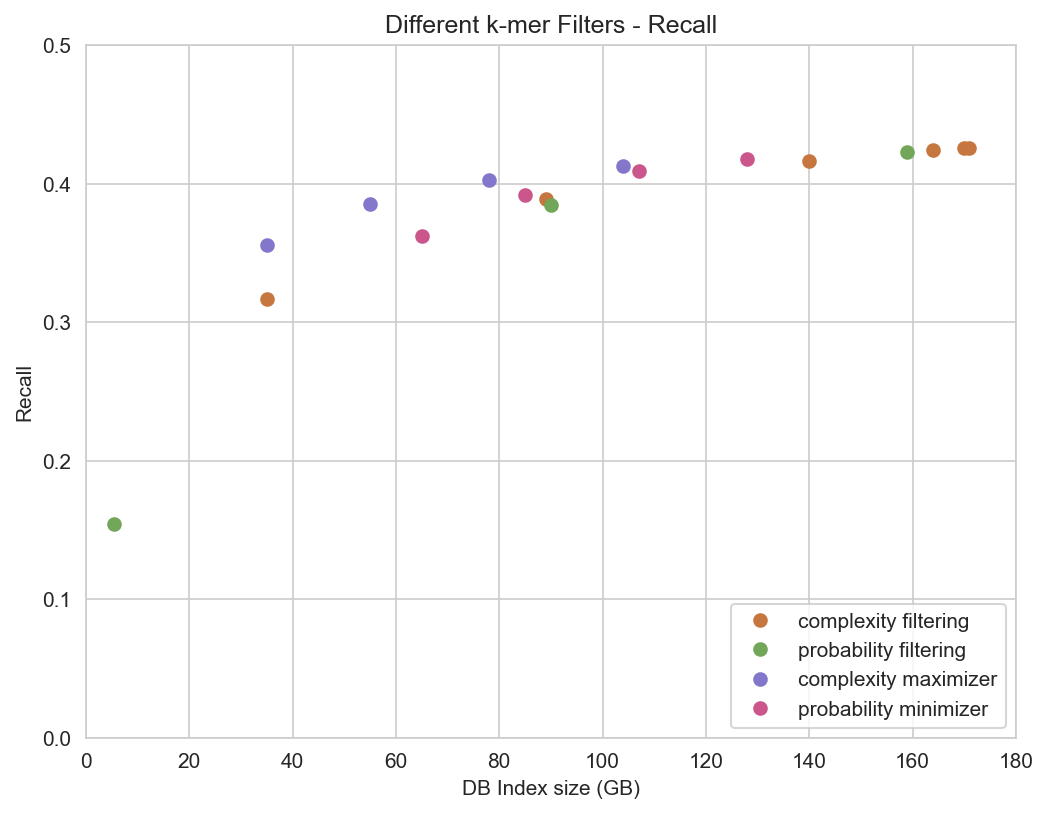

In [41]:
colors = { "c >": "#c6763f", "p <": "#72a659", "max": "#8377cb", "min": "#ca568b"}

rank = "species"

# creating legends
handles_symbols = [
    Line2D([], [], marker="o", color="#c6763f", label="complexity filtering", linestyle="None"),
    Line2D([], [], marker="o", color="#72a659", label="probability filtering", linestyle="None"),
    Line2D([], [], marker="o", color="#8377cb", label="complexity maximizer", linestyle="None"),
    Line2D([], [], marker="o", color="#ca568b", label="probability minimizer", linestyle="None")
]

plt.figure(figsize=(8, 6), dpi=150)

for filtering in data_zymo_mock["filtering"].unique():
    color = colors[filtering[0:3]]
    data_filtered = data_zymo_mock[(data_zymo_mock["rank"] == rank) & (data_zymo_mock["filtering"] == filtering)]
    plt.scatter(data_filtered["DB Index size"], data_filtered["recall"], label=rank, color=color, marker="o")

plt.xlim(0, 180)
plt.ylim(0, 0.5)
plt.xlabel("DB Index size (GB)")
plt.ylabel("Recall")
plt.title("Different k-mer Filters - Recall")

plt.legend(handles=handles_symbols, loc="lower right")
plt.show()

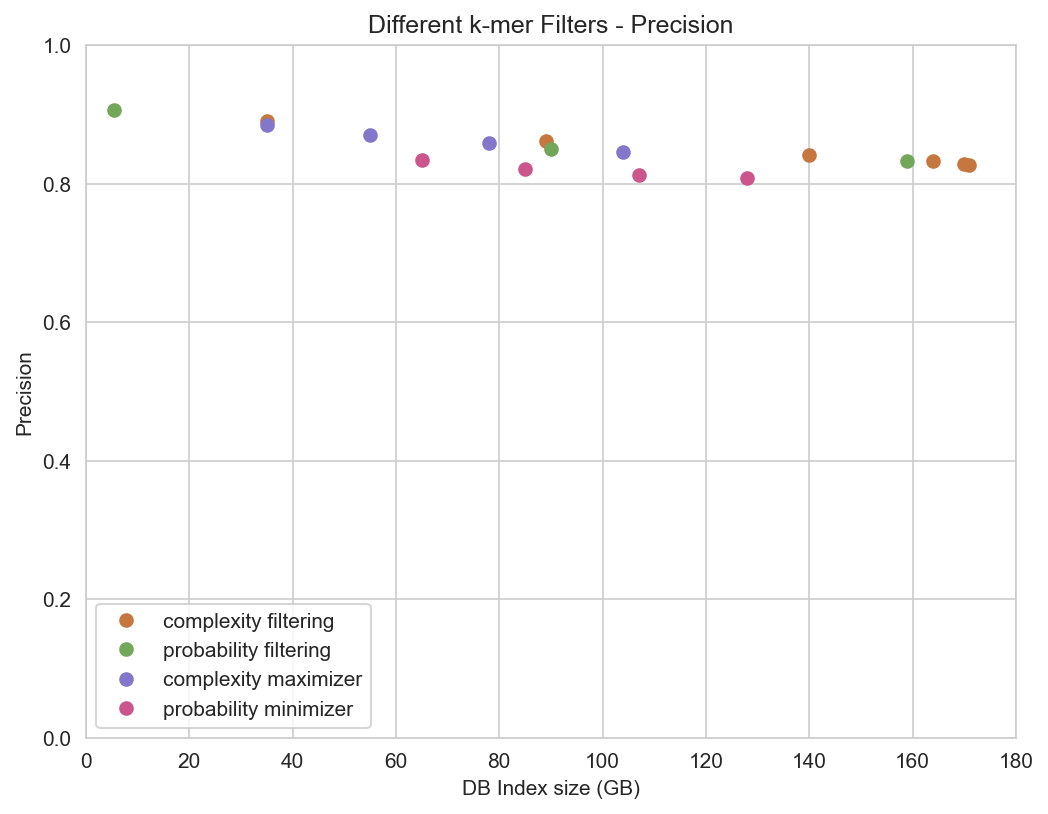

In [40]:
colors = { "c >": "#c6763f", "p <": "#72a659", "max": "#8377cb", "min": "#ca568b"}

rank = "species"

# creating legends
handles_symbols = [
    Line2D([], [], marker="o", color="#c6763f", label="complexity filtering", linestyle="None"),
    Line2D([], [], marker="o", color="#72a659", label="probability filtering", linestyle="None"),
    Line2D([], [], marker="o", color="#8377cb", label="complexity maximizer", linestyle="None"),
    Line2D([], [], marker="o", color="#ca568b", label="probability minimizer", linestyle="None")
]

plt.figure(figsize=(8, 6), dpi=150)

for filtering in data_zymo_mock["filtering"].unique():
    color = colors[filtering[0:3]]
    data_filtered = data_zymo_mock[(data_zymo_mock["rank"] == rank) & (data_zymo_mock["filtering"] == filtering)]
    plt.scatter(data_filtered["DB Index size"], data_filtered["precision"], label=rank, color=color, marker="o")

plt.xlim(0, 180)
plt.ylim(0, 1)
plt.xlabel("DB Index size (GB)")
plt.ylabel("Precision")
plt.title("Different k-mer Filters - Precision")

plt.legend(handles=handles_symbols)
plt.show()